Follow this ****[notebook](https://www.kaggle.com/gaurav2022/eda-dataviz-resample/)**** for EDA,data visualization and to know how I came to particular decision to prepare data.

# Importing and preparing data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import layers
import keras
 
%matplotlib inline
tf.random.set_seed(42)

ImportError: cannot import name '_imaging' from 'PIL' (/usr/lib/python3/dist-packages/PIL/__init__.py)

In [42]:
df = pd.read_csv('../input/mobile-health/mhealth_raw_data.csv')
df

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.449020,-1.01030,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.449020,-1.01030,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.449020,-1.01030,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.456860,-1.00820,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.456860,-1.00820,0.025862,0,subject1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215740,1.7849,-9.8287,0.29725,-0.341370,-0.90056,-0.61493,-3.7198,-8.9071,0.294230,0.041176,-0.99384,-0.480600,0,subject10
1215741,1.8687,-9.8766,0.46236,-0.341370,-0.90056,-0.61493,-3.7160,-8.7455,0.448140,0.041176,-0.99384,-0.480600,0,subject10
1215742,1.6928,-9.9290,0.16631,-0.341370,-0.90056,-0.61493,-3.8824,-9.1155,0.450480,0.041176,-0.99384,-0.480600,0,subject10
1215743,1.5279,-9.6306,0.30458,-0.341370,-0.90056,-0.61493,-3.5564,-9.1441,0.594880,0.041176,-0.99384,-0.480600,0,subject10


In [43]:
from sklearn.utils import resample
 
df_majority = df[df.Activity==0]
df_minorities = df[df.Activity!=0]
 
df_majority_downsampled = resample(df_majority,n_samples=30000, random_state=42)
df = pd.concat([df_majority_downsampled, df_minorities])
df.Activity.value_counts()

11    30720
10    30720
9     30720
5     30720
4     30720
3     30720
2     30720
1     30720
0     30000
7     29441
8     29337
6     28315
12    10342
Name: Activity, dtype: int64

In [44]:
#Dropping feature have data outside 98% confidence interval
df1 = df.copy()

for feature in df1.columns[:-2]:
  lower_range = np.quantile(df[feature],0.01)
  upper_range = np.quantile(df[feature],0.99)
  print(feature,'range:',lower_range,'to',upper_range)

  df1 = df1.drop(df1[(df1[feature]>upper_range) | (df1[feature]<lower_range)].index, axis=0)
  print('shape',df1.shape)

alx range: -11.473120000000002 to 19.233
shape (365733, 14)
aly range: -19.378999999999998 to 2.4478719999999976
shape (359934, 14)
alz range: -18.95 to 14.19623999999999
shape (356240, 14)
glx range: -0.74212 to 0.80705
shape (349347, 14)
gly range: -1.0694 to 0.96623
shape (342811, 14)
glz range: -1.1061 to 0.8290799999999999
shape (337361, 14)
arx range: -21.492 to 9.097647999999998
shape (332280, 14)
ary range: -18.694000000000006 to 11.948059999999998
shape (326215, 14)
arz range: -10.367 to 11.823119999999996
shape (323650, 14)
grx range: -1.0196 to 0.95686
shape (320165, 14)
gry range: -1.1417 to 0.90965
shape (315329, 14)
grz range: -0.69828 to 1.125
shape (310906, 14)


In [45]:
label_map = {
    0: 'Nothing',
    1: 'Standing still',  
    2: 'Sitting and relaxing', 
    3: 'Lying down',  
    4: 'Walking',  
    5: 'Climbing stairs',  
    6: 'Waist bends forward',
    7: 'Frontal elevation of arms', 
    8: 'Knees bending (crouching)', 
    9: 'Cycling', 
    10: 'Jogging', 
    11: 'Running', 
    12: 'Jump front & back' 
}

# Modeling Data Preparation

Follow this ****[notebook](https://www.kaggle.com/gaurav2022/eda-dataviz-resample/)**** to see how I select time frame for model data preparation.

In [46]:
#spliting data into train and test set
train = df1[(df1['subject'] != 'subject10') & (df1['subject'] != 'subject9')]
test = df1.drop(train.index, axis=0)
train.shape,test.shape

((246483, 14), (64423, 14))

In [47]:
X_train = train.drop(['Activity','subject'],axis=1)
y_train = train['Activity']
X_test = test.drop(['Activity','subject'],axis=1)
y_test = test['Activity']
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((246483, 12), (246483,), (64423, 12), (64423,))

In [48]:
from scipy import stats

#function to create time series datset for seuence modeling
def create_dataset(X, y, time_steps, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        x = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(x)
        ys.append(stats.mode(labels)[0][0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)

In [49]:
X_train,y_train = create_dataset(X_train, y_train, 100, step=50)
X_train.shape, y_train.shape

((4928, 100, 12), (4928, 1))

In [50]:
X_test,y_test = create_dataset(X_test, y_test, 100, step=50)
X_test.shape, y_test.shape

((1287, 100, 12), (1287, 1))

# Model building

In [51]:
model = keras.Sequential()
model.add(layers.Input(shape=[100,12]))
model.add(layers.Conv1D(filters=32, kernel_size=3, padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())
model.add(layers.Conv1D(filters=64, kernel_size=3, padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())
model.add(layers.MaxPool1D(2))
model.add(layers.LSTM(64))
model.add(layers.Dense(units=128, activation='relu'))
model.add(layers.Dense(13, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 100, 32)           1184      
_________________________________________________________________
batch_normalization_4 (Batch (None, 100, 32)           128       
_________________________________________________________________
re_lu_4 (ReLU)               (None, 100, 32)           0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 100, 64)           6208      
_________________________________________________________________
batch_normalization_5 (Batch (None, 100, 64)           256       
_________________________________________________________________
re_lu_5 (ReLU)               (None, 100, 64)           0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 50, 64)           

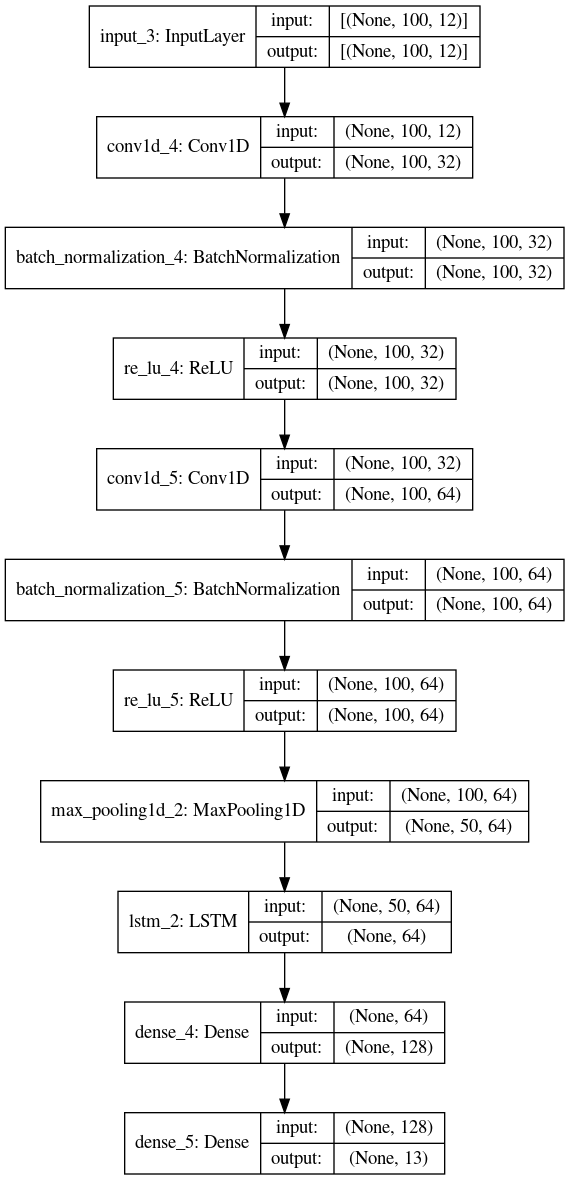

In [52]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [53]:
callbacks = [keras.callbacks.ModelCheckpoint("mhealth_best.h5", save_best_only=True, monitor="val_loss"),
             keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1)]
 
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["sparse_categorical_accuracy"],)
 
model_history = model.fit(X_train,y_train, epochs= 10, validation_data=(X_test,y_test), callbacks=callbacks)

Epoch 1/10
154/154 [==============================] - 3s 9ms/step - loss: 1.4112 - sparse_categorical_accuracy: 0.5647 - val_loss: 2.9530 - val_sparse_categorical_accuracy: 0.3497
Epoch 2/10
154/154 [==============================] - 1s 6ms/step - loss: 0.1792 - sparse_categorical_accuracy: 0.9399 - val_loss: 0.3887 - val_sparse_categorical_accuracy: 0.8998
Epoch 3/10
154/154 [==============================] - 1s 6ms/step - loss: 0.1270 - sparse_categorical_accuracy: 0.9556 - val_loss: 0.2455 - val_sparse_categorical_accuracy: 0.9495
Epoch 4/10
154/154 [==============================] - 1s 6ms/step - loss: 0.0943 - sparse_categorical_accuracy: 0.9706 - val_loss: 0.1526 - val_sparse_categorical_accuracy: 0.9293
Epoch 5/10
154/154 [==============================] - 1s 6ms/step - loss: 0.0744 - sparse_categorical_accuracy: 0.9766 - val_loss: 0.1950 - val_sparse_categorical_accuracy: 0.9542
Epoch 6/10
154/154 [==============================] - 1s 6ms/step - loss: 0.0483 - sparse_categorica

# Model Evaluation

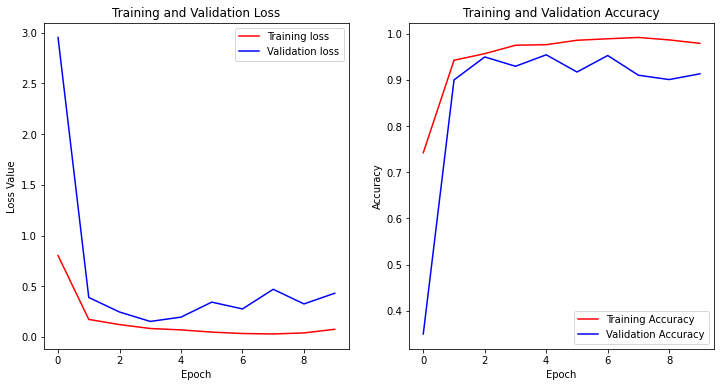

In [54]:
train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
train_accuracy = model_history.history['sparse_categorical_accuracy']
val_accuracy = model_history.history['val_sparse_categorical_accuracy']

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(train_loss, 'r', label='Training loss')
plt.plot(val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_accuracy, 'r', label='Training Accuracy')
plt.plot(val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [60]:
model = keras.models.load_model('./mhealth_best.h5')

train_loss, train_acc = model.evaluate(X_train,y_train)
test_loss, test_acc = model.evaluate(X_test,y_test)

print("Train accuracy", round(train_acc*100, 2),'%')
print("Train loss", train_loss)
print("Test accuracy", round(test_acc*100, 2),'%')
print("Test loss", test_loss)

41/41 [==============================] - 1s 3ms/step - loss: 0.1526 - sparse_categorical_accuracy: 0.9293
Train accuracy 98.54 %
Train loss 0.047073278576135635
Test accuracy 92.93 %
Test loss 0.15258093178272247


In [61]:
pred = model.predict(X_test)
pred = np.argmax(pred, axis = 1)
pred = pred.reshape(-1,1)

In [62]:
pred.shape,y_test.shape

((1287, 1), (1287, 1))

In [63]:
from sklearn.metrics import confusion_matrix, classification_report
 
print(classification_report(y_test,pred))
print('*'*50)
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       0.99      1.00      1.00       122
           2       0.67      0.98      0.79       124
           3       0.98      0.51      0.67       122
           4       1.00      0.99      1.00       120
           5       0.91      0.93      0.92        84
           6       0.93      0.99      0.96       106
           7       0.99      0.99      0.99       112
           8       0.94      0.89      0.91       116
           9       1.00      0.98      0.99       121
          10       0.96      1.00      0.98        89
          11       0.98      1.00      0.99        52
          12       1.00      0.85      0.92        27

    accuracy                           0.93      1287
   macro avg       0.95      0.93      0.93      1287
weighted avg       0.94      0.93      0.93      1287

**************************************************
[[ 92   0   0   0   0   0   

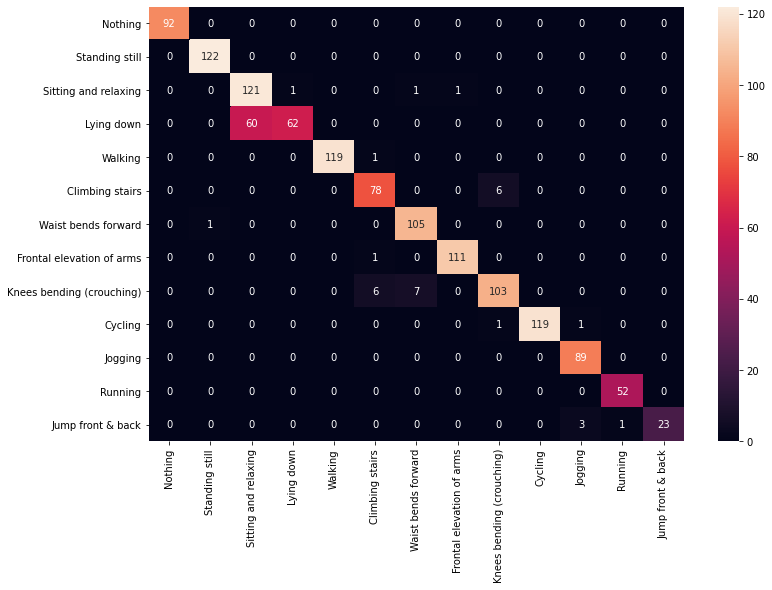

In [64]:
plt.figure(figsize=(12,8))
conf_matrix = confusion_matrix(y_test,pred)
sns.heatmap(conf_matrix, xticklabels= label_map.values(), yticklabels= label_map.values(), annot=True, fmt="d")
plt.show()

Model performs really well on almost all activities but confuses between sitting and lying down. This would be solved by doing feature engineering, that will be the future task. 

If you have learn something new, Kindly upvote to help community :)

You can follow this ****[github repo](https://github.com/G0rav/Human_Activity_Recognition)**** for future advancments. 